<a href="https://colab.research.google.com/github/matibag1714977/LabiagiProject/blob/main/Progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Progetto-Scene Classification**

Import

In [1]:
import numpy as np      #to perform mathematical operations on arrays and matrices
import matplotlib.pyplot as plt  #to visualize images and plot graphs

#provides algoithms and tools for data analysis and modeling(classification,regression,clustering)
from sklearn.model_selection import train_test_split        
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#It provides a user-friendly interface for building and training deep learning models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

# It provides various tools and functions for image and video processing, including image filtering, feature detection, and object tracking.
import cv2
import imghdr
import os
import tensorflow as tf


import torch
import torchvision
import torchvision.transforms as transforms



Import dataset Prova

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

folder_id = '1pFM_HpOjh0qbAadk0-1Fz89mwLHrnQHB?usp=share_link'
data_path = '/content/gdrive/MyDrive/Dataset/Prova'


# mount the folder
drive.mount('/content/gdrive', force_remount=True)




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


Mostra alcune immagini

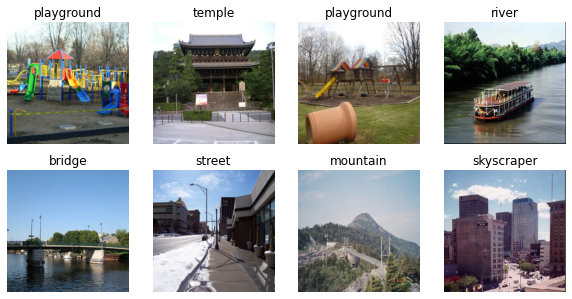

In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image



# Target image size
image_size = (224, 224)

# Path to the main SUN397 dataset directory
dataset_path = "/content/gdrive/MyDrive/Dataset/Prova"

# List of the 10 classes to display
classes_to_display = ["beach", "temple", "forest", "mountain", "airport_terminal", "river", "street", "playground", "skyscraper","bridge"]

# List of all the image filepaths in the selected classes
selected_images = []
for class_name in classes_to_display:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)
        if filepath.endswith(".jpg"):
            selected_images.append((filepath, class_name))  # Add class name to the tuple

# Sample 8 random images from the selected images
sample_images = random.sample(selected_images, 8)

# Display the images with their filenames as titles
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
for i in range(2):
    for j in range(4):
        # Open the image using the PIL library
        img = Image.open(sample_images[i*4+j][0])
        # Resize the image to the target size
        img = img.resize(image_size)
        # Convert the image to RGB format (if it's grayscale)
        img = img.convert('RGB')
        # Display the image in the subplot
        ax[i][j].imshow(img)
        ax[i][j].axis('off')
        # Get the filename of the image
        filename = os.path.basename(sample_images[i*4+j][0])
        # Get the class name of the image
        class_name = sample_images[i*4+j][1]
        # Set the title of the subplot to the class name and filename
        ax[i][j].set_title(f"{class_name}")
plt.show()


Normalizing